In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from scipy.constants import c as speed_of_light
from scipy.integrate import simpson 
from tqdm import tqdm
from scipy.interpolate import interp1d
import prodimopy.read as pread
from scipy.stats import kendalltau, spearmanr, pearsonr

In [3]:
# Open the data 
with open('FLiTsData1000.pkl', 'rb') as f:
    df = pickle.load(f)
df.head()

,Model Name,C Value,O Value,CO Value,FLiTs Wavelength,FLiTs Flux,FLiTs atomic Flux,FLiTs atomic Wavelength,FLiTs CH4 Flux,FLiTs CH4 Wavelength,...,FLiTs NH3 Flux,FLiTs NH3 Wavelength,FLiTs NO Flux,FLiTs NO Wavelength,FLiTs O2 Flux,FLiTs O2 Wavelength,FLiTs OH Flux,FLiTs OH Wavelength,FLiTs C2H2 Wavelength,FLiTs C2H2 Flux
0,C_-0.5_O_-0.5_CO_0.45,-0.5,-0.5,0.45,"[4.90216873, 4.90218508, 4.90220144, 4.9022177...","[0.0009643296611260843, 0.0009735034849698287,...","[-1.3877787807814457e-16, -1.1102230246251565e...","[4.91004966, 4.91006604, 4.91008242, 4.9100988...","[0.0, 0.0, 0.0, 5.551115123125783e-17, 1.11022...","[5.83017478, 5.83019423, 5.83021367, 5.8302331...",...,"[5.551115123125783e-17, -1.1102230246251565e-1...","[4.92191407, 4.92193049, 4.92194691, 4.9219633...","[2.8186461475343538e-05, 2.8899044866553814e-0...","[4.94498186, 4.94499836, 4.94501485, 4.9450313...","[-1.1102230246251565e-16, -1.1102230246251565e...","[5.82143071, 5.82145013, 5.82146955, 5.8214889...","[3.839822426687789e-08, 3.914706903085374e-08,...","[5.04256821, 5.04258503, 5.04260185, 5.0426186...","[4.90216873, 4.90218508, 4.90220144, 4.9022177...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,C_-0.5_O_-0.25_CO_0.2570,-0.5,-0.25,0.2570,"[4.90218508, 4.90220144, 4.90221779, 4.9022341...","[0.004067687708073475, 0.0040748347712056265, ...","[-8.326672684688674e-17, -8.326672684688674e-1...","[4.9100988, 4.91011517, 4.91013155, 4.91014793...","[-2.7755575615628914e-16, -3.885780586188048e-...","[5.83017478, 5.83019423, 5.83021367, 5.8302331...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6653345369377...","[4.92189765, 4.92191407, 4.92193049, 4.9219469...","[5.455045169738826e-05, 5.57964574059433e-05, ...","[4.94499836, 4.94501485, 4.94503135, 4.9450478...","[2.7755575615628914e-16, 2.7755575615628914e-1...","[5.82146955, 5.82148897, 5.82150839, 5.8215278...","[8.642852605822426e-08, 8.852198368769493e-08,...","[5.04258503, 5.04260185, 5.04261867, 5.0426354...","[4.90218508, 4.90220144, 4.90221779, 4.9022341...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,C_-0.5_O_0.0_CO_0.145,-0.5,0.0,0.145,"[4.90221779, 4.90222315, 4.9022395, 4.90225585...","[0.006994756799092228, 0.00699622903455438, 0....","[0.0, 0.0, 2.7755575615628914e-17, 5.551115123...","[4.91018069, 4.91019707, 4.91021345, 4.9102298...","[1.1102230246251565e-16, 2.220446049250313e-16...","[5.83017478, 5.83019423, 5.83021367, 5.8302331...",...,"[0.0, 0.0, 0.0, -5.551115123125783e-17, -5.551...","[4.92189765, 4.92191407, 4.92193049, 4.9219469...","[8.98434293424566e-05, 9.179616055002282e-05, ...","[4.94501485, 4.94503135, 4.94504784, 4.9450643...","[1.6653345369377348e-16, 1.6653345369377348e-1...","[5.82148897, 5.82150839, 5.82152781, 5.8215472...","[2.2606257266133412e-07, 2.300231963792143e-07...","[5.04258503, 5.04260185, 5.04261867, 5.0426354...","[4.90221779, 4.90222315, 4.9022395, 4.90225585...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,C_-0.5_O_0.25_CO_0.0813,-0.5,0.25,0.0813,"[4.9022395, 4.90225585, 4.9022722, 4.90228855,...","[0.010322807927214295, 0.010317067430515525, 0...","[2.7755575615628914e-17, 2.7755575615628914e-1...","[4.91027896, 4.91029534, 4.91031172, 4.9103281...","[2.220446049250313e-16, 2.220446049250313e-16,...","[5.83017478, 5.83019423, 5.83021367, 5.8302331...",...,"[2.7755575615628914e-16, 0.0, -5.5511151231257...","[4.92189765, 4.92191407, 4.92193049, 4.9219469...","[0.00012909757029855307, 0.0001318028760430856...","[4.94504784, 4.94506434, 4.94508083, 4.9450973...","[6.38626929116981e-11, 6.583755762790133e-11, ...","[5.82150839, 5.82152781, 5.82154722, 5.8215666...","[3.1542691703023706e-07, 3.2251283543782705e-0...","[5.04261867, 5.04263549, 5.04265231, 5.0426691...","[4.9022395, 4.90225585, 4.9022722, 4.90228855,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,C_-0.5_O_0.5_CO_0.045,-0.5,0.5,0.045,"[4.90225585, 4.9022722, 4.90228855, 4.90230491...","[0.008905396890832917, 0.00890696426121479, 0....","[0.0, 2.775557561562891

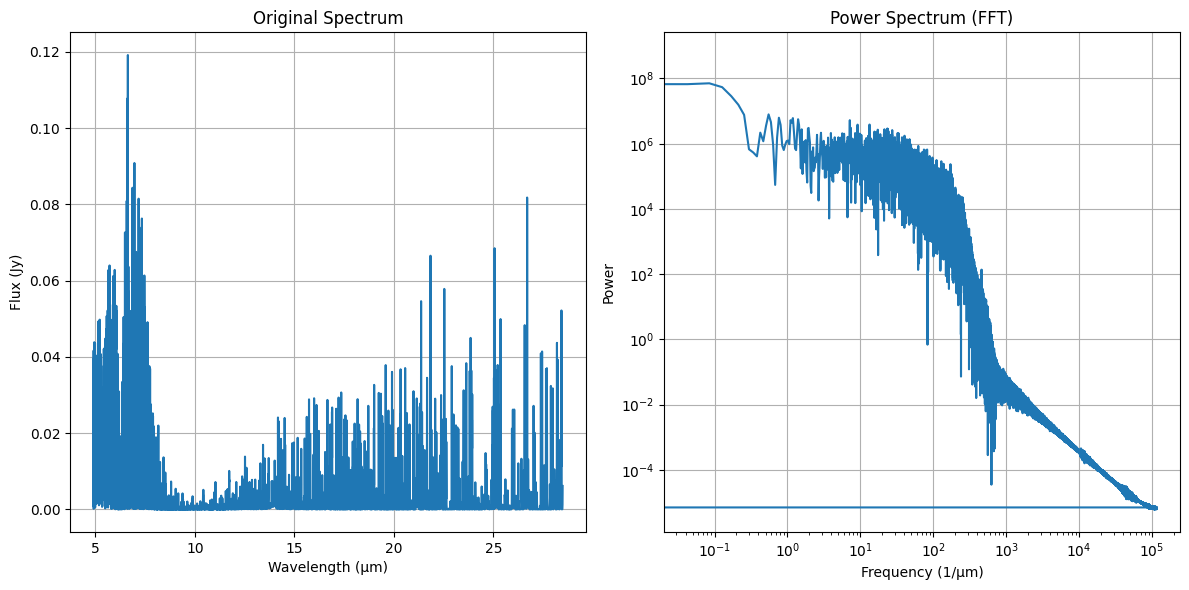

In [23]:
species = ['atomic', 'C2H2', 'CO', 'CO2', 'H2O', 'HCN','NH3', 'NO', 'O2', 'OH']
total = None
NH3_freq = np.fft.fftfreq(len(df[f'FLiTs NH3 Flux'].values[0]))
NH3_fft = np.fft.fft(df[f'FLiTs NH3 Flux'].values[0])
total = np.zeros_like(NH3_fft)
# model = df['Model Name'][i]
# for specie in species:
model = df['Model Name'][0]
specie_wl = df.loc[df['Model Name'] == model, f'FLiTs Wavelength'].values[0].copy()
specie_flux = df.loc[df['Model Name'] == model, f'FLiTs Flux'].values[0].copy()
new_wavelength = np.linspace(np.min(specie_wl), np.max(specie_wl), num=len(specie_wl)*10)
interpolate_func = interp1d(specie_wl, specie_flux, kind='linear', fill_value="extrapolate")
new_flux = interpolate_func(new_wavelength)
# plt.plot(new_wavelength, new_flux)
# # plt.title(f'{specie} Flux')
# plt.show()
# plt.plot(NH3_freq, total)
# # plt.legend()
# plt.xscale('log')
# # plt.ylim(2e6, 2.2e6)
# plt.show()
N = len(new_flux)
flux_fft = np.fft.fft(new_flux)

# Corresponding frequency values (1/μm, based on wavelength grid)
d_lambda = new_wavelength[1] - new_wavelength[0]  # Wavelength spacing (in microns)
frequencies = np.fft.fftfreq(N, d_lambda)  # Frequency values in 1/μm

# Power Spectrum (magnitude of FFT)
power_spectrum = np.abs(flux_fft)**2

# Plot the original spectrum and its power spectrum
plt.figure(figsize=(12, 6))

# Plot original spectrum
plt.subplot(1, 2, 1)
plt.plot(new_wavelength, new_flux, label="Original Spectrum")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Flux (Jy)")
plt.title("Original Spectrum")
plt.grid()

# Plot power spectrum (frequency domain)
plt.subplot(1, 2, 2)
plt.plot(frequencies, power_spectrum)
plt.xlabel("Frequency (1/μm)")
plt.ylabel("Power")
plt.title("Power Spectrum (FFT)")
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.tight_layout()
plt.show()

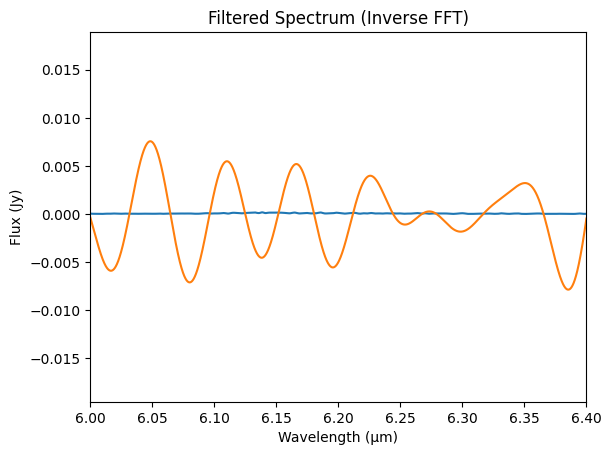

In [26]:
filtered_flux_fft = flux_fft.copy()
filtered_flux_fft[(np.abs(frequencies) < 10)|(np.abs(frequencies) > 20)] = 0  # Remove high-frequency components

# Inverse FFT to reconstruct filtered spectrum
filtered_flux = np.fft.ifft(filtered_flux_fft)

# Plot the filtered spectrum
specie_wl = df.loc[df['Model Name'] == model, f'FLiTs NH3 Wavelength'].values[0].copy()
specie_flux = df.loc[df['Model Name'] == model, f'FLiTs NH3 Flux'].values[0].copy()

plt.plot(specie_wl, specie_flux)
plt.plot(new_wavelength, np.real(filtered_flux), label="Filtered Spectrum")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Flux (Jy)")
plt.title("Filtered Spectrum (Inverse FFT)")
plt.xlim(6, 6.4)
# plt.ylim(0, 0.0005)
plt.show()

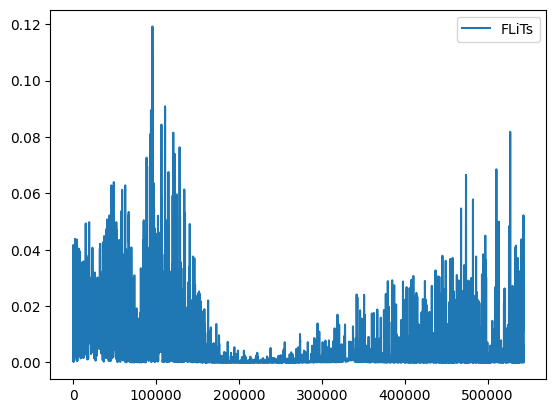

In [6]:
X = np.fft.fftfreq(len(df[f'FLiTs Flux'].values[0]))
Y = df[f'FLiTs Flux'].values[0]

plt.plot(abs(Y), label='FLiTs')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')
plt.show()